In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import pmdarima as pmd
pd.set_option('display.max_rows', 200)

In [195]:
df = pd.read_csv("preprocessed_df.csv")
print(df.shape)
df.head(2)

(476333, 19)


,Store,Dept,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Weekly_Sales_to_fill,upper_bound,lower_bound,outlier,Weekly_Sales_to_fill_outlier
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50,18535.48,33293.5925,6415.2525,False,24924.500
1,1,2,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,50605.27,45561.85,52774.9225,39007.7825,False,35481.995


## Prepare Train and Test data

In [197]:
#ARIMA model only need sales
df = df[["Store","Dept","Date","Weekly_Sales"]]
df['Date'] = pd.to_datetime(df['Date'])
print(df.shape)
df.head(2)

(476333, 4)


,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,2,2010-02-05,50605.27


In [198]:
# Find the 105th week
date = list(df["Date"].value_counts().keys())
date.sort()
date[104]

Timestamp('2012-02-03 00:00:00')

In [199]:
# use 2012-02-03 to 2012-11-01 as test data
train_df = df[df["Date"]<date[104]].reset_index(drop=True)
print(train_df.shape)
train_df.head(2)

(346424, 4)


,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,2,2010-02-05,50605.27


In [200]:
test_df = df[df["Date"]>=date[104]].reset_index(drop=True)
print(test_df.shape)
test_df.head(2)

(129909, 4)


,Store,Dept,Date,Weekly_Sales
0,1,1,2012-02-03,23510.49
1,1,2,2012-02-03,54322.24


## Build ARIMA for Store 19 Dept 50

            Weekly_Sales
Date                    
2010-02-05       3146.96
2010-02-12       7948.98
2010-02-19       2634.11
2010-02-26       9921.81
2010-03-05      24094.81


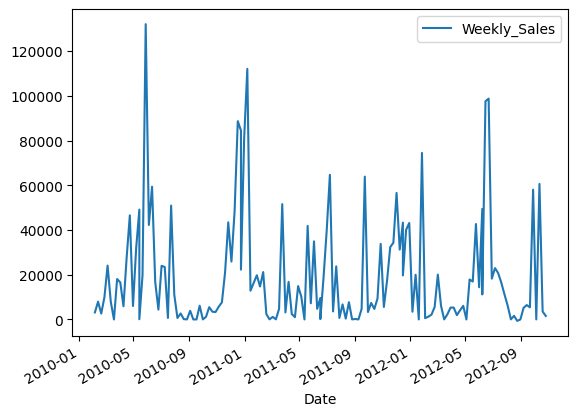

In [201]:
df_store19_dept50 = df[(df["Store"]==19)&(train_df["Dept"]==50)][["Date","Weekly_Sales"]]
df_store19_dept50.set_index('Date', inplace=True)
print(df_store19_dept50.head())
df_store19_dept50.plot()
plt.show()

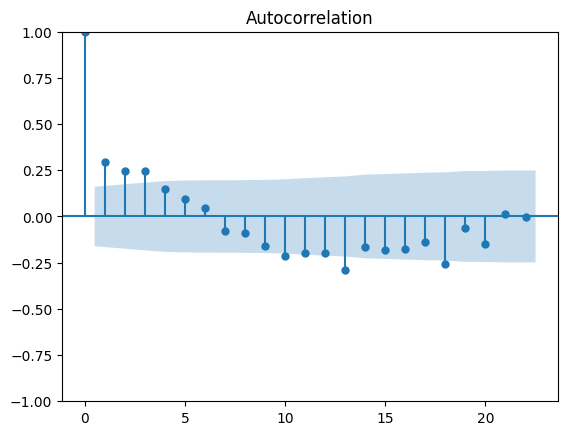

In [202]:
plot_acf(df_store19_dept50)
plt.show()

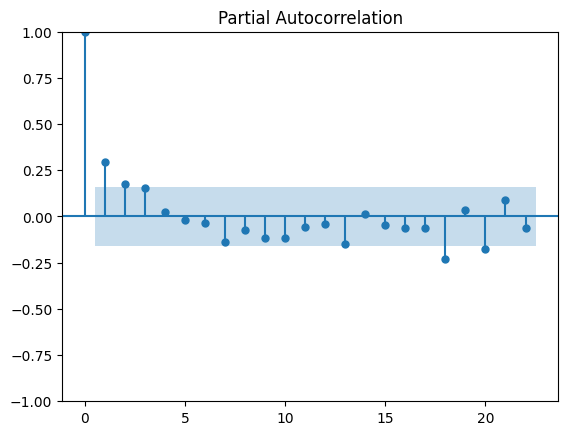

In [203]:
plot_pacf(df_store19_dept50)
plt.show()

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  148
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1698.094
Date:                Thu, 08 Aug 2024   AIC                           3406.187
Time:                        21:07:31   BIC                           3421.173
Sample:                             0   HQIC                          3412.276
                                - 148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.935e+04   4360.764      4.438      0.000    1.08e+04    2.79e+04
ar.L1          0.2125      0.069      3.068      0.002       0.077       0.348
ar.L2          0.1397      0.075      1.869      0.0

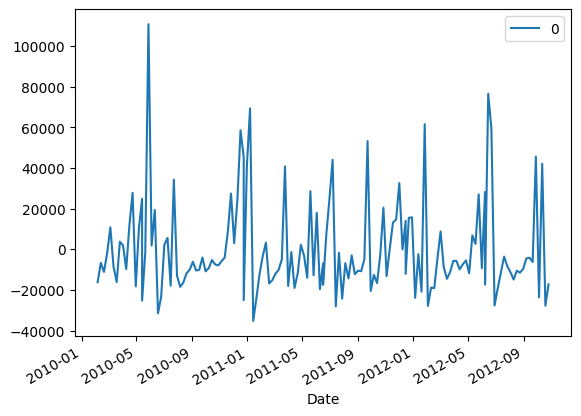

In [204]:
# fit an ARIMA model and plot residual errors
# series.index = series.index.to_period('M')
# fit model
model = ARIMA(df_store19_dept50, order=(3,0,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

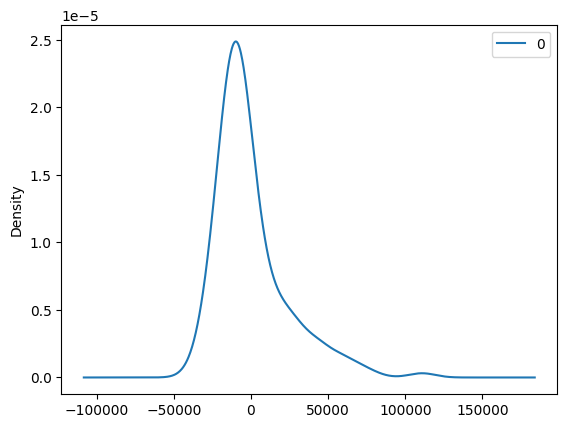

                   0
count     148.000000
mean      -34.795838
std     23330.071369
min    -35262.271881
25%    -13412.519602
50%     -6781.649372
75%      6847.202769
max    110831.802173


In [205]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

/var/folders/ry/5l37ld9j319_17ytxrp8r3r00000gn/T/ipykernel_26809/2180975702.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=34722.176107, expected=3446.220000
predicted=25066.944215, expected=20008.860000
predicted=26969.383904, expected=10.000000
predicted=9028.209824, expected=74503.880000
predicted=32739.447210, expected=576.000000
predicted=19967.409514, expected=1229.460000
predicted=24511.097161, expected=2150.460000
predicted=12809.169870, expected=5590.510000
predicted=2787.213634, expected=20058.520000
predicted=8754.394363, expected=6129.840000
predicted=8401.377340, expected=13.410000
predicted=8191.204712, expected=2272.510000
predicted=5606.357520, expected=5286.760000
predicted=3184.939457, expected=5315.460000
predicted=3603.561767, expected=1921.450000
predicted=3712.204797, expected=4106.580000
predicted=4174.979937, expected=6074.600000
predicted=4293.728912, expected=-3.020000
predicted=2825.109488, expected=17883.130000
predicted=8412.185734, expected=16949.540000
predicted=10443.290519, expected=42694.290000
predicted=23472.638621, expected=14398.250000
predicted=21907.191204,

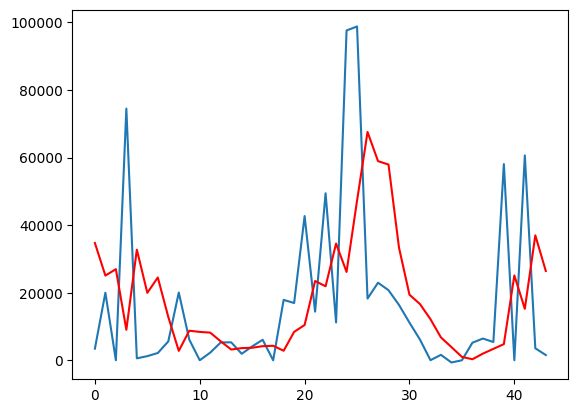

In [210]:
# split into train and test sets
X = df_store19_dept50.values
size = 104
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=2411.837, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=2410.846, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=2392.531, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=2375.384, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=2408.870, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=2376.321, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=2377.365, Time=0.54 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=2377.347, Time=1.32 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=2375.641, Time=0.28 sec
 ARIMA(0,1,1)(1,0,2)[52] intercept   : AIC=inf, Time=9.07 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=2409.856, Time=0.31 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=2377.382, Time=0.47 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=2377.783, Time=0.32 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=2392.533, Time=0.25 sec
 ARIMA(1,1,2)(0,0,1)[52]

/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/lezhang/Documents/onecareer/onecareer-venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'SARIMA')

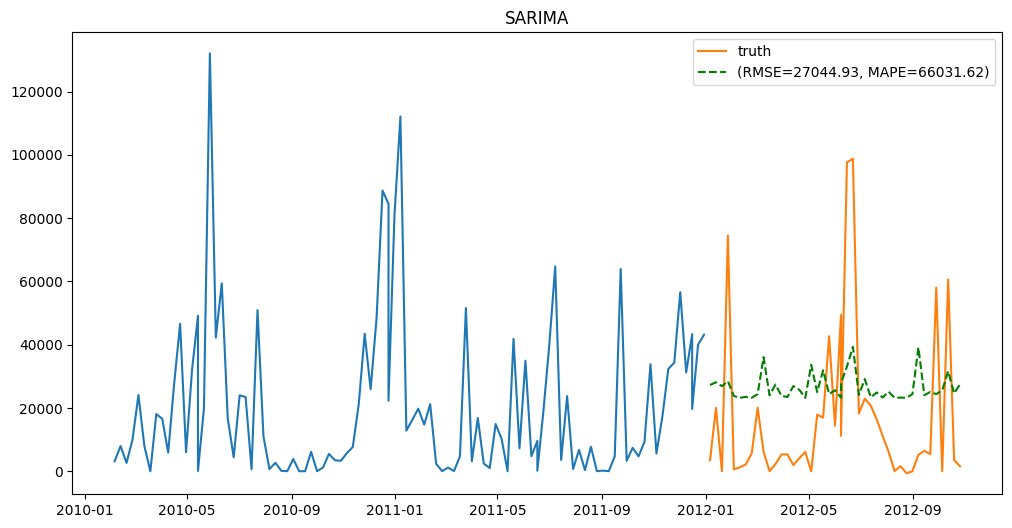

In [211]:
train, test = df_store19_dept50[0:size], df_store19_dept50[size:len(df_store19_dept50)]
model = pmd.auto_arima(train, 
                      m=52,               # frequency of series                      
                      seasonal=True,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
pred=model.predict(n_periods=44)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
mape = mean_absolute_percentage_error(test.values, pred.values) * 100

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train.values);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred.values, linestyle='--', color='green', label="(RMSE={:0.2f}, MAPE={:0.2f})".format(sse1,mape));
ax.legend()
ax.set_title("SARIMA")

In [212]:
# print model summary
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  104
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 52)   Log Likelihood               -1183.562
Date:                             Thu, 08 Aug 2024   AIC                           2373.124
Time:                                     21:18:36   BIC                           2381.028
Sample:                                          0   HQIC                          2376.325
                                             - 104                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6782      0.064    -10.538      0.000      -0.804      -0.552
ar.S.L52       0.2490      

## Build model for Stores 19, 15, 13

In [213]:
df_store = df.groupby(["Store","Date"])["Weekly_Sales"].sum().reset_index()
df_store = df_store[df_store["Store"].isin([19,15,13])]
print(df_store.shape)
df_store.head(2)

(429, 3)


,Store,Date,Weekly_Sales
1716,13,2010-02-05,1968595.62
1717,13,2010-02-12,2032296.55


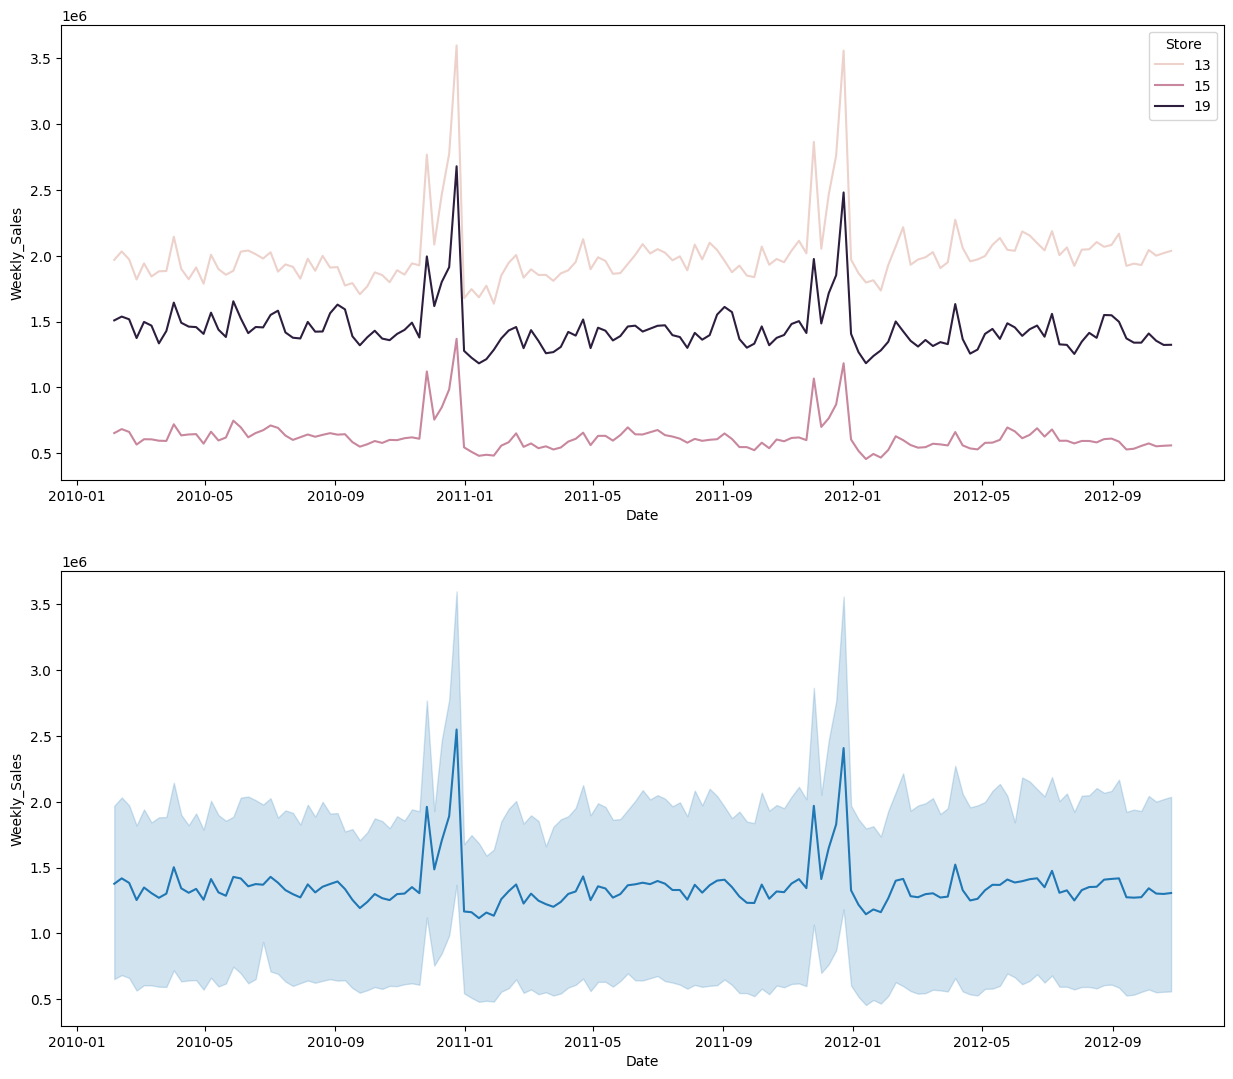

In [214]:
fig, axs = plt.subplots(2,1, figsize = (15,13))
sns.lineplot(ax = axs[0], data = df_store, x = 'Date', y = 'Weekly_Sales', hue = 'Store')
sns.lineplot(ax = axs[1], data = df_store, x = 'Date', y = 'Weekly_Sales')
plt.show()

In [215]:
df_store_pivot = pd.pivot_table(df_store, values='Weekly_Sales', index=['Date'], columns=['Store'])
df_store_pivot

Store,13,15,19
Date,,,
2010-02-05,1968595.62,652573.260,1508596.140
2010-02-12,2032296.55,682765.480,1537501.240
2010-02-19,1971649.73,661289.570,1516847.020
2010-02-26,1819327.88,565356.560,1374250.930
2010-03-05,1941457.99,605776.250,1496823.120
2010-03-12,1842152.50,604930.920,1468848.170
2010-03-19,1881272.45,594483.030,1333899.320
2010-03-26,1883573.54,592883.850,1427984.740
2010-04-02,2143947.70,719216.040,1643741.500


In [229]:
size = 104
train, test = df_store_pivot[0:size], df_store_pivot[size:len(df_store_pivot)]

In [230]:
# Initialize empty lists to store forecast data
data_fc = []
data_lower = []
data_upper = []
data_aic = []
data_fitted = []

index_of_fc = test.index
# Iterate over columns in data
for group in train.columns:
    # Fit an ARIMA model using the auto_arima function
    data_actual = train[group]
    model = pmd.auto_arima(data_actual, 
                          start_p=0, start_q=0,
                          max_p=3, max_q=3, # maximum p and q
                          test='adf',         # use adftest to find optimal 'd'
                          seasonal=True,  # TRUE if seasonal series
                          m=52,               # frequency of series
                          d=None,             # let model determine 'd'
                          D=None,             # let model determine 'D'
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    
    # Generate forecast and confidence intervals for n_periods into the future
    fc, confint = model.predict(n_periods=39, return_conf_int=True)
      
    # Append forecast data to lists
    data_fc.append(fc)
    data_lower.append(confint[:, 0])
    data_upper.append(confint[:, 1])
    data_aic.append(model.aic())
    data_fitted.append(model.fittedvalues())

# Create dataframes for forecast, lower bound, and upper bound
df_fc = pd.DataFrame(index = index_of_fc)
df_lower = pd.DataFrame(index = index_of_fc)
df_upper = pd.DataFrame(index = index_of_fc)
df_aic = pd.DataFrame(index=[1])
df_fitted = pd.DataFrame(index = data_actual.index)

# Populate dataframes with forecast data
for i, group in enumerate(train.columns):
    df_fc[group] = data_fc[i][:]
    df_lower[group] = data_lower[i][:]
    df_upper[group] = data_upper[i][:]
    df_aic[group] = data_aic[i]
    df_fitted[group] = data_fitted[i][:]

In [175]:
df_fc

,13,15,19
Date,,,
2012-02-03,1.885023e+06,552989.772436,1.375657e+06
2012-02-10,1.950039e+06,585575.942774,1.427342e+06
2012-02-17,1.998614e+06,636091.960991,1.452265e+06
2012-02-24,1.918023e+06,590939.203302,1.377578e+06
2012-03-02,1.941573e+06,602765.367722,1.444127e+06
2012-03-09,1.928725e+06,582213.303422,1.399746e+06
2012-03-16,1.924312e+06,592193.219751,1.361015e+06
2012-03-23,1.897529e+06,578340.563691,1.355128e+06
2012-03-30,1.899739e+06,572369.957677,1.353022e+06


In [176]:
df_lower

,13,15,19
Date,,,
2012-02-03,1.332130e+06,307834.530433,9.787554e+05
2012-02-10,1.354678e+06,320398.871350,1.006286e+06
2012-02-17,1.396661e+06,367613.762891,1.028236e+06
2012-02-24,1.315009e+06,321895.946775,9.531730e+05
2012-03-02,1.338388e+06,333624.808540,1.019674e+06
2012-03-09,1.325513e+06,313055.971701,9.752864e+05
2012-03-16,1.321094e+06,323032.996358,9.365548e+05
2012-03-23,1.294311e+06,309179.841743,9.306680e+05
2012-03-30,1.296521e+06,303209.149773,9.285624e+05


In [177]:
df_upper

,13,15,19
Date,,,
2012-02-03,2.437917e+06,798145.014438,1.772560e+06
2012-02-10,2.545400e+06,850753.014198,1.848399e+06
2012-02-17,2.600568e+06,904570.159090,1.876294e+06
2012-02-24,2.521037e+06,859982.459828,1.801984e+06
2012-03-02,2.544759e+06,871905.926904,1.868580e+06
2012-03-09,2.531938e+06,851370.635143,1.824205e+06
2012-03-16,2.527529e+06,861353.443145,1.785475e+06
2012-03-23,2.500747e+06,847501.285639,1.779588e+06
2012-03-30,2.502957e+06,841530.765581,1.777483e+06


In [220]:
df_aic

,13,15,19
1,2880.182711,2712.384016,2813.144816


In [179]:
df_fitted

,13,15,19
Date,,,
2010-02-05,1.993432e+06,6.374539e+05,1.467185e+06
2010-02-12,1.983440e+06,6.437318e+05,1.481951e+06
2010-02-19,2.009068e+06,6.562684e+05,1.492257e+06
2010-02-26,1.984669e+06,6.473510e+05,1.484893e+06
2010-03-05,1.923385e+06,6.075173e+05,1.434048e+06
2010-03-12,1.972522e+06,6.243006e+05,1.477753e+06
2010-03-19,1.932568e+06,6.239495e+05,1.467778e+06
2010-03-26,1.948307e+06,6.196113e+05,1.419660e+06
2010-04-02,1.949233e+06,6.189473e+05,1.453207e+06


In [231]:
# Assign input data to separate variables
data_actual = train.copy(deep=True)
data_forecast = df_fc.copy(deep=True)

# Add a 'desc' column to indicate whether the data is actual or forecast
data_actual['desc'] = 'Actual'
data_forecast['desc'] = 'Forecast'

# Combine actual and forecast data into a single DataFrame and reset the index
df_act_fc = pd.concat([data_actual, data_forecast]).reset_index()
df_act_fc

,Date,13,15,19,desc
0,2010-02-05,1.968596e+06,6.525733e+05,1.508596e+06,Actual
1,2010-02-12,2.032297e+06,6.827655e+05,1.537501e+06,Actual
2,2010-02-19,1.971650e+06,6.612896e+05,1.516847e+06,Actual
3,2010-02-26,1.819328e+06,5.653566e+05,1.374251e+06,Actual
4,2010-03-05,1.941458e+06,6.057762e+05,1.496823e+06,Actual
5,2010-03-12,1.842152e+06,6.049309e+05,1.468848e+06,Actual
6,2010-03-19,1.881272e+06,5.944830e+05,1.333899e+06,Actual
7,2010-03-26,1.883574e+06,5.928838e+05,1.427985e+06,Actual
8,2010-04-02,2.143948e+06,7.192160e+05,1.643742e+06,Actual
9,2010-04-09,1.899799e+06,6.350791e+05,1.490572e+06,Actual


In [232]:
# Melt the data for plotting
df_melt = df_act_fc.melt(id_vars = ['Date', 'desc'])
df_melt_fitted = df_fitted.reset_index().melt(id_vars = ['Date'])
df_melt_fitted

,Date,variable,value
0,2010-02-05,13,1.993432e+06
1,2010-02-12,13,1.983440e+06
2,2010-02-19,13,2.009068e+06
3,2010-02-26,13,1.984669e+06
4,2010-03-05,13,1.923385e+06
...,...,...,...
307,2011-12-30,19,1.502852e+06
308,2012-01-06,19,1.353973e+06
309,2012-01-13,19,1.291650e+06
310,2012-01-20,19,1.285421e+06


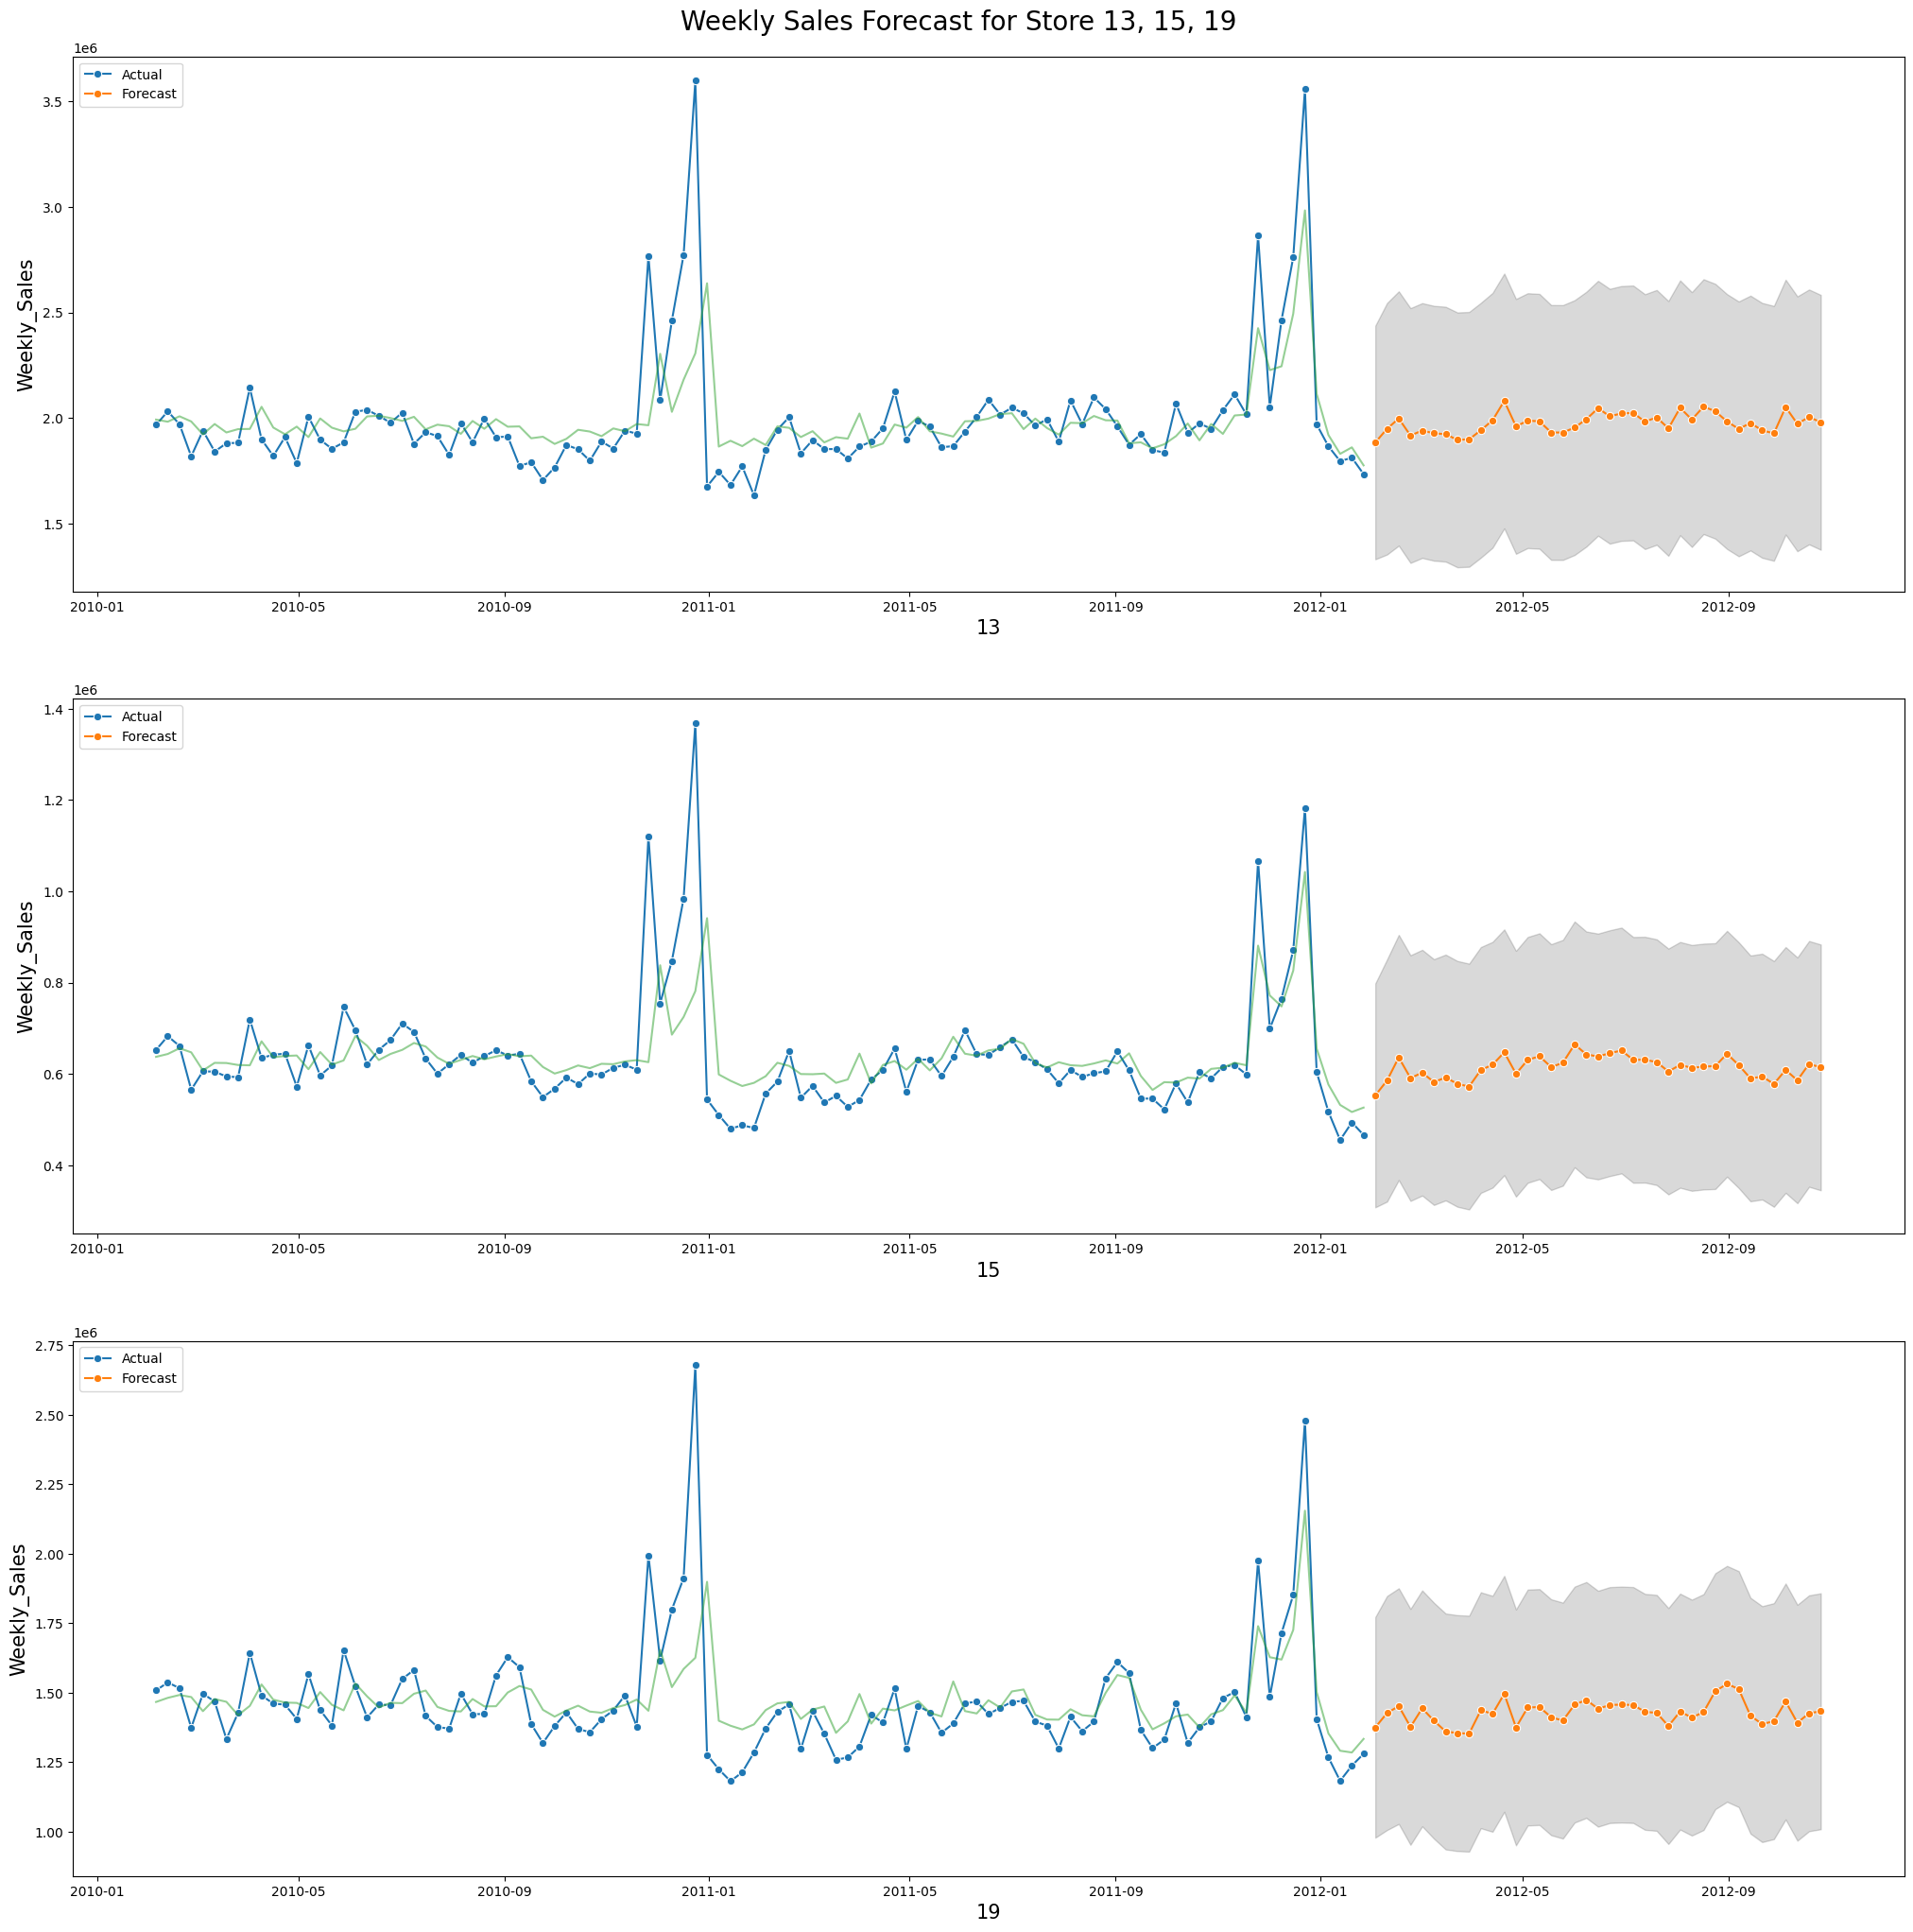

In [245]:
# Create subplots and set the title
fig, axs = plt.subplots(3, 1, figsize = (25,25))
fig.suptitle("Weekly Sales Forecast for Store 13, 15, 19", size = 20, y = 0.90)

for i, cat in enumerate(df_act_fc.drop(['Date', 'desc'], axis = 1).columns):
    # Filter data for the current category
    df_plot = df_melt[df_melt['variable'] == cat]
    df_lower_plot = df_lower[cat]
    df_upper_plot = df_upper[cat]
    df_plot_fitted = df_melt_fitted[df_melt_fitted['variable'] == cat]

    # Plot the actual and forecasted data
    sns.lineplot(ax = axs[i], data = df_plot, x = 'Date', y = 'value', hue = 'desc', marker = 'o')
    # Plot the fitted data with dashed lines
    sns.lineplot(ax = axs[i], data = df_plot_fitted, x = 'Date', y = 'value', dashes=True, alpha = 0.5)
    # Set the x-label, y-label, and fill between the lower and upper bounds of the forecast
    axs[i].set_xlabel(cat, size = 15)
    axs[i].set_ylabel("Weekly_Sales", size = 15)
    axs[i].fill_between(df_lower_plot.index, 
                  df_lower_plot, 
                  df_upper_plot, 
                  color='k', alpha=.15)
    # Set the legend and y-limits
    axs[i].legend(loc = 'upper left')

plt.show()